<a href="https://colab.research.google.com/github/FelixEbenezer/AmazonSageMakerCourse/blob/master/TestQuant_FelixNganga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. PRE TRAITEMENT DE DONNÉES AVEC PANDAS ET SKLEARN

# Import de bibliothéques

In [1]:
import pandas as pd
import numpy as np
#from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#drive.mount('/content/drive')

Mounted at /content/drive


# Analyse Exploratoire et descriptive

In [2]:
candidat_df = pd.read_csv('/content/data_v1.0.csv')
candidat_df

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


In [3]:
candidat_df.drop(["Unnamed: 0", "index"], axis=1, inplace= True)
candidat_df.head(2)

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0


In [4]:
candidat_df.shape, candidat_df.columns

((20000, 11),
 Index(['date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
        'specialite', 'note', 'dispo', 'embauche'],
       dtype='object'))

In [5]:
candidat_df.describe()

,age,exp,salaire,note,embauche
count,19909.000000,19904.000000,19905.000000,19886.000000,20000.000000
mean,35.004521,9.500352,34974.343934,75.168762,0.114600
std,9.609169,3.012109,5003.099616,17.095926,0.318547
min,-3.000000,-2.000000,14128.000000,8.680000,0.000000
25%,29.000000,7.000000,31596.000000,63.720000,0.000000
50%,35.000000,9.000000,34979.000000,75.080000,0.000000
75%,41.000000,12.000000,38358.000000,86.617500,0.000000
max,74.000000,23.000000,53977.000000,143.220000,1.000000


In [6]:
candidat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        19909 non-null  object 
 1   cheveux     19897 non-null  object 
 2   age         19909 non-null  float64
 3   exp         19904 non-null  float64
 4   salaire     19905 non-null  float64
 5   sexe        19900 non-null  object 
 6   diplome     19890 non-null  object 
 7   specialite  19907 non-null  object 
 8   note        19886 non-null  float64
 9   dispo       19894 non-null  object 
 10  embauche    20000 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 1.7+ MB


In [7]:
candidat_df.describe(include=object)

,date,cheveux,sexe,diplome,specialite,dispo
count,19909,19897,19900,19890,19907,19894
unique,1826,4,2,4,4,2
top,2012-02-03,chatain,M,master,geologie,non
freq,24,6022,11889,7513,10028,11848


In [8]:
np.unique(candidat_df['embauche'], return_counts=True)

(array([0, 1]), array([17708,  2292]))

# Visualisation de données

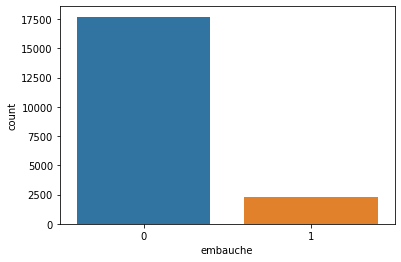

In [9]:
sns.countplot(x = candidat_df['embauche']);

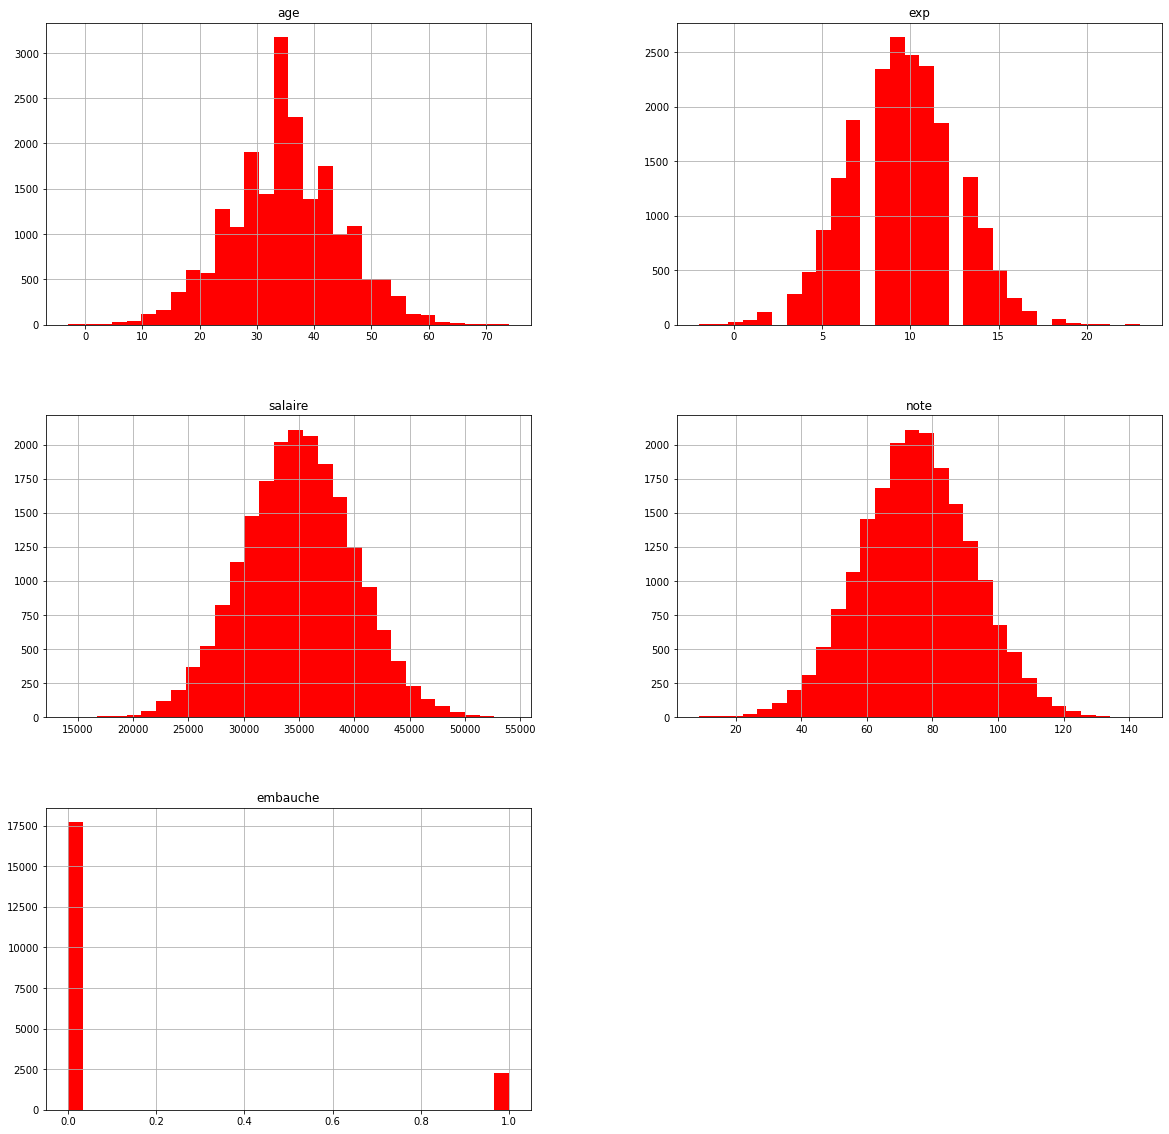

In [10]:
candidat_df.hist(bins=30, figsize=(20,20), color='r'); 

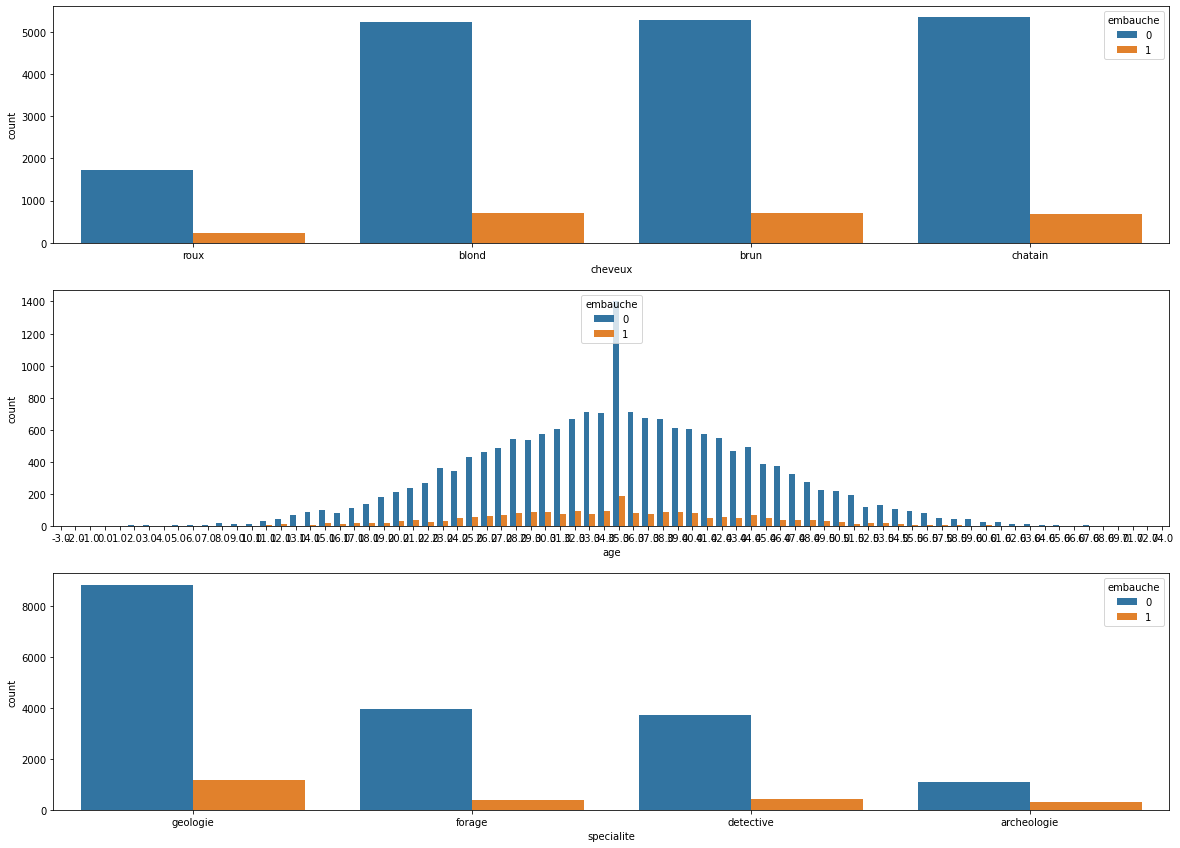

In [11]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'cheveux', hue = 'embauche', data = candidat_df)
plt.subplot(412)
sns.countplot(x = 'age', hue = 'embauche', data = candidat_df)
plt.subplot(413)
sns.countplot(x = 'specialite', hue = 'embauche', data = candidat_df)

In [12]:
grafico = px.scatter_matrix(candidat_df, dimensions=['age', 'cheveux', 'specialite'], color = 'embauche')
grafico.show()

# Traitement de valeurs inconsistentes ou outliers

In [13]:
candidat_df.loc[candidat_df['age'] < 18]

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
44,2014-12-11,brun,16.0,7.0,29858.0,M,master,geologie,76.18,non,0
112,2010-12-09,brun,14.0,13.0,34851.0,F,master,forage,74.46,non,0
164,2011-02-18,brun,10.0,9.0,38767.0,F,master,archeologie,89.16,oui,0
190,2011-10-16,chatain,16.0,9.0,38461.0,F,licence,detective,74.70,non,0
194,2010-06-15,brun,17.0,7.0,37927.0,M,licence,geologie,65.19,oui,0
...,...,...,...,...,...,...,...,...,...,...,...
19910,2012-04-14,brun,13.0,9.0,35383.0,M,doctorat,forage,90.35,oui,0
19912,2011-05-11,chatain,17.0,3.0,33723.0,F,doctorat,archeologie,97.09,oui,0
19921,2011-09-02,chatain,16.0,7.0,39557.0,M,master,detective,61.87,oui,0
19930,2012-07-02,blond,17.0,4.0,36613.0,M,licence,geologie,64.39,non,0


In [14]:
candidat_df.loc[candidat_df['age'] < 0]

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
1842,2012-02-25,blond,-1.0,6.0,38176.0,M,bac,detective,44.88,non,0
3968,2011-12-08,brun,-3.0,11.0,26167.0,M,doctorat,forage,121.74,oui,0
19605,2012-12-11,chatain,-2.0,12.0,27837.0,M,doctorat,geologie,90.50,oui,0


In [15]:
candidat_df.loc[candidat_df['exp'] < 0]

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
6025,2013-05-06,blond,36.0,-1.0,29241.0,M,master,geologie,85.34,non,0
11284,2013-08-05,chatain,34.0,-2.0,51294.0,M,licence,detective,38.40,oui,0


In [16]:
candidat_df.loc[candidat_df.age<18,'age'] = candidat_df.age.mean()

candidat_df.loc[candidat_df.exp<0,'exp'] = candidat_df.exp.mean()

# Traitement de valeurs manquantes

In [17]:
candidat_df.isnull().sum()

date           91
cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64

In [ ]:
#Il existe plusieurs façon de traiter ces NaN, ou je les élimine tous si leur % est négligeable, ou je les remplace par mean ou median 
#selon le besoin

In [18]:
#Je calcule le % de ces NaN
print('Nans Percentage :\n')
for col in list(candidat_df):
    nbr = candidat_df[col].isna().sum()
    if nbr != 0:
        print("{} : {} ==> {:.2f} %".format(col,candidat_df[col].isna().sum(),100.0*candidat_df[col].isna().sum()/candidat_df[col].shape[0]))

Nans Percentage :

date : 91 ==> 0.46 %
cheveux : 103 ==> 0.52 %
age : 91 ==> 0.46 %
exp : 96 ==> 0.48 %
salaire : 95 ==> 0.47 %
sexe : 100 ==> 0.50 %
diplome : 110 ==> 0.55 %
specialite : 93 ==> 0.47 %
note : 114 ==> 0.57 %
dispo : 106 ==> 0.53 %


In [19]:
#Ça represente moins de 2% du dataset total, je choisis pour le moment de les éliminer, mais quand je vais vouloir faire des améliorations
#j´aimera bien choisir l autre option (Mean ou Median)
candidat_df.dropna(inplace=True)

In [20]:
candidat_df.duplicated().sum()

0

# Les valeurs catégorielles

In [21]:
print('Values : \n')
for i in list(candidat_df):
    print(i + ': ' + str(candidat_df[i].unique()), end="\n\n")

Values : 

date: ['2012-06-02' '2011-04-21' '2012-09-07' ... '2010-04-21' '2011-03-04'
 '2011-07-11']

cheveux: ['roux' 'blond' 'chatain' 'brun']

age: [25.         35.         29.         37.         33.         31.
 43.         28.         50.         44.         39.         23.
 38.         30.         42.         27.         19.         40.
 49.         26.         59.         41.         34.         24.
 35.00452057 36.         48.         47.         53.         20.
 22.         54.         46.         45.         61.         56.
 32.         55.         52.         65.         51.         21.
 57.         62.         18.         58.         67.         63.
 69.         64.         60.         72.         66.         71.
 68.        ]

exp: [ 9.         13.          6.          8.         12.         10.
 11.          4.         14.          3.          7.         15.
  5.          2.         17.          0.         16.          1.
 21.         18.         19.         20.        

# Les corrélations

In [22]:
correlations = candidat_df.corr()

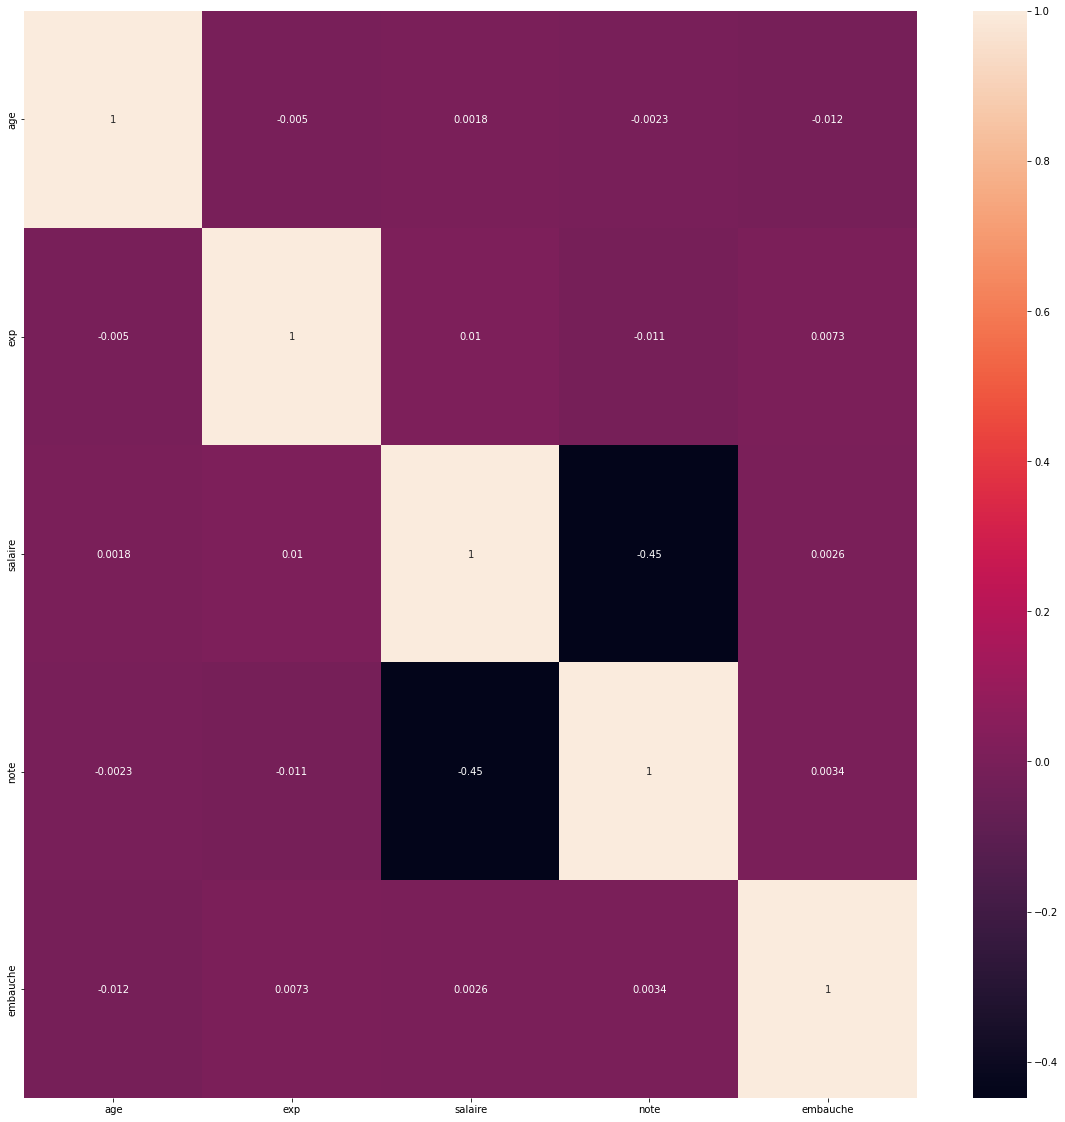

In [23]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

In [27]:
employee_df.columns

Index(['date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
       'specialite', 'note', 'dispo', 'embauche'],
      dtype='object')

In [28]:
#Je mets d abord toutes ces données dans um meme sous dataset
X_cat = employee_df[['cheveux','sexe', 'diplome','specialite', 'dispo']]
X_cat

,cheveux,sexe,diplome,specialite,dispo
0,roux,F,licence,geologie,non
1,blond,M,licence,forage,non
2,blond,M,licence,geologie,non
4,roux,F,licence,detective,non
5,chatain,M,master,geologie,non
...,...,...,...,...,...
19995,roux,M,licence,geologie,non
19996,chatain,F,master,geologie,non
19997,chatain,F,doctorat,detective,oui
19998,chatain,F,licence,detective,non


In [29]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [30]:
X_cat.shape

(19021, 16)

In [31]:
type(X_cat)

numpy.ndarray

In [32]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [33]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
19017,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19019,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
X_numerical = employee_df[['date', 'age', 'exp', 'salaire', 'note', 'embauche']]
X_numerical

,date,age,exp,salaire,note,embauche
0,2012-06-02,25.0,9.0,26803.0,97.08,0
1,2011-04-21,35.0,13.0,38166.0,63.86,0
2,2012-09-07,29.0,13.0,35207.0,78.50,0
4,2012-08-07,35.0,6.0,28533.0,81.91,0
5,2014-02-12,37.0,8.0,38558.0,63.46,1
...,...,...,...,...,...,...
19995,2012-03-10,47.0,9.0,35723.0,66.47,0
19996,2010-09-19,38.0,10.0,33570.0,62.29,1
19997,2010-09-02,23.0,6.0,33751.0,103.48,0
19998,2011-12-06,33.0,11.0,34167.0,73.35,0


In [36]:
X_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19021 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      19021 non-null  object 
 1   age       19021 non-null  float64
 2   exp       19021 non-null  float64
 3   salaire   19021 non-null  float64
 4   note      19021 non-null  float64
 5   embauche  19021 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB


In [37]:
X_numerical['date'] = pd.to_datetime(X_numerical['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
X_numerical.age = X_numerical.age.astype(int)
X_numerical.exp = X_numerical.exp.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
X_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19021 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      19021 non-null  datetime64[ns]
 1   age       19021 non-null  int64         
 2   exp       19021 non-null  int64         
 3   salaire   19021 non-null  float64       
 4   note      19021 non-null  float64       
 5   embauche  19021 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 1.5 MB


In [46]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
19017,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19019,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [47]:
X_numerical

,date,age,exp,salaire,note,embauche
0,2012-06-02,25,9,26803.0,97.08,0
1,2011-04-21,35,13,38166.0,63.86,0
2,2012-09-07,29,13,35207.0,78.50,0
4,2012-08-07,35,6,28533.0,81.91,0
5,2014-02-12,37,8,38558.0,63.46,1
...,...,...,...,...,...,...
19995,2012-03-10,47,9,35723.0,66.47,0
19996,2010-09-19,38,10,33570.0,62.29,1
19997,2010-09-02,23,6,33751.0,103.48,0
19998,2011-12-06,33,11,34167.0,73.35,0


In [55]:
X_all = pd.concat([X_cat, X_numerical.reset_index(drop=True)], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,date,age,exp,salaire,note,embauche
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,2012-06-02,25,9,26803.0,97.08,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,2011-04-21,35,13,38166.0,63.86,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,2012-09-07,29,13,35207.0,78.50,0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,2012-08-07,35,6,28533.0,81.91,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,2014-02-12,37,8,38558.0,63.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,2012-03-10,47,9,35723.0,66.47,0
19017,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,2010-09-19,38,10,33570.0,62.29,1
19018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2010-09-02,23,6,33751.0,103.48,0
19019,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,2011-12-06,33,11,34167.0,73.35,0


In [59]:
X = X_all.drop(["date", "embauche"], axis=1)
y = X_all["embauche"]

In [60]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,age,exp,salaire,note
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,25,9,26803.0,97.08
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35,13,38166.0,63.86
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,29,13,35207.0,78.50
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35,6,28533.0,81.91
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,37,8,38558.0,63.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,47,9,35723.0,66.47
19017,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,38,10,33570.0,62.29
19018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,23,6,33751.0,103.48
19019,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,33,11,34167.0,73.35


In [61]:
y

0        0
1        0
2        0
3        0
4        1
        ..
19016    0
19017    1
19018    0
19019    0
19020    0
Name: embauche, Length: 19021, dtype: int64

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [63]:
X

array([[0.        , 0.        , 0.        , ..., 0.44      , 0.31807574,
        0.65705366],
       [1.        , 0.        , 0.        , ..., 0.6       , 0.60322718,
        0.41013825],
       [1.        , 0.        , 0.        , ..., 0.6       , 0.52897187,
        0.51895347],
       ...,
       [0.        , 0.        , 1.        , ..., 0.32      , 0.49243394,
        0.70462316],
       [0.        , 0.        , 1.        , ..., 0.52      , 0.50287335,
        0.48067489],
       [0.        , 1.        , 0.        , ..., 0.64      , 0.76215212,
        0.27456519]])

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [65]:
X_train.shape, y_train

((14265, 20), 1689     0
 11636    0
 1139     1
 245      0
 7088     0
         ..
 18367    0
 11032    0
 11882    0
 10897    0
 11308    1
 Name: embauche, Length: 14265, dtype: int64)

In [66]:
X_test.shape, y_test

((4756, 20), 4649     0
 11409    1
 2252     0
 12147    0
 7653     0
         ..
 1838     0
 13330    1
 13309    0
 13793    0
 14373    0
 Name: embauche, Length: 4756, dtype: int64)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logistic = LogisticRegression()
#on va entrainer notre modele avec X_train et y_train
logistic.fit(X_train, y_train)

LogisticRegression()

In [69]:
#Une fois que notre modele est entrainé, on va lui passer les donnees de X_test pour qu il fasse la prediction
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
y_test

4649     0
11409    1
2252     0
12147    0
7653     0
        ..
1838     0
13330    1
13309    0
13793    0
14373    0
Name: embauche, Length: 4756, dtype: int64

In [71]:
y_test

4649     0
11409    1
2252     0
12147    0
7653     0
        ..
1838     0
13330    1
13309    0
13793    0
14373    0
Name: embauche, Length: 4756, dtype: int64

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
#On mesure pour comparer les donnees predictes contenues dans y_pred et les vraies données en y_test
accuracy_score(y_test, y_pred)

0.8883515559293524

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4225,    0],
       [ 531,    0]])

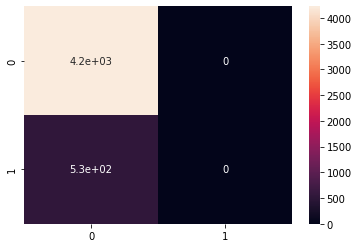

In [76]:
sns.heatmap(cm, annot=True);

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [78]:
precision_score(y_test, y_pred)  #On a une bonne precision par rapport a soit le modele arrive tres bien a predire ceux qui sortent par exemple

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [79]:
recall_score(y_test, y_pred) #Recall_score sera dans ce cas pour savoir combine le modele a predire ceux qui restent, ce qui est tres en bas , donc notre modele


0.0

In [80]:
f1_score(y_test, y_pred, average='macro')  #f1_score est la combinaison en moyenne entre precision et recall de chaque valeur 81 ou 0)

0.47043759046876743

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4225
           1       0.00      0.00      0.00       531

    accuracy                           0.89      4756
   macro avg       0.44      0.50      0.47      4756
weighted avg       0.79      0.89      0.84      4756



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
y_pred = forest.predict(X_test)

In [85]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
accuracy_score(y_test, y_pred)

0.9232548359966358

In [87]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[4165,  305],
       [  60,  226]])

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4225
           1       0.79      0.43      0.55       531

    accuracy                           0.92      4756
   macro avg       0.86      0.71      0.76      4756
weighted avg       0.92      0.92      0.91      4756

